In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

import dask.array as da
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

import seaborn as sns


#### Import compiled_SUPERsnow.nc

In [2]:
fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow.nc'

#ds full
ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
ds.close()

#~~~~~~~~~~~~~~ds small
# dsmall = ds.sel(time='2013')
# dsmall.close()

# ds = dsmall
# ds.close()

#~~~~~~~~~~~ds peak
dpeak = ds.isel(time=[0,7,22,28,41,49])
dpeak.close()

ds = dpeak
ds.close()




#### test terrain layers

In [ ]:
# #brake filepath.......
# terrain_path = ''
# flist_terrain = sorted(glob.glob(terrain_path))
# flist_terrain

In [ ]:
# terrain = xr.open_dataset(flist_terrain[0]).rename({'Band1':'aspect'}) #, concat_dim='time', combine='nested', chunks={'x':1000, 'y':1000}, parallel=True)
# terrain

In [ ]:
# plt.imshow(terrain.aspect, cmap='Set2')

#### test histogram

In [ ]:
bigshape = (200000, 4000)
chunk_shape = (1000, 1000)
big_ones = da.ones(bigshape, chunks=chunk_shape)
big_ones


In [ ]:
big_calc = (big_ones * big_ones[::-1, ::-1]).mean()

with ProgressBar():
    result = big_calc.compute()
result

In [ ]:
mu = ds.snow.mean(dim=('x','y'))

with ProgressBar():
    result = mu.compute()
result


In [ ]:
def histogram(x):
    h, bx = np.histogram(x[x !=0], bins=binx)
    return h, bx[:-1]


In [ ]:
binx = np.arange(0,2500,2)

with ProgressBar():
    h, bx = xr.apply_ufunc(histogram, ds.snow[5].values/10, dask='parallelized', output_dtypes=[np.float32])


In [ ]:
print('h', h.shape)
print('bx',  bx.shape)


In [ ]:
fig=plt.figure(figsize=(10,5))
plt.bar(bx,h, align='edge',)
plt.xlim(0,600)

In [ ]:
def sns_histogram(x):
    ax = sns.distplot(x[x !=0], hist=True, bins=binx)
    return ax


In [ ]:
binx = np.arange(0,2500,2)

with ProgressBar():
    ax = xr.apply_ufunc(sns_histogram, ds.snow[0].values/10, dask='parallelized', output_dtypes=[np.int16])


In [ ]:
ds

#### one-to-one

In [3]:
#s1~~~~~~~
s1 = ds.snow[0].values.flatten()
s1_gt_zero = s1 > 0

#s2~~~~~~
s2 = ds.snow[1].values.flatten()
s2_gt_zero = s2 > 0

In [4]:
print(s1.shape)
print(s2.shape)

(298708138,)
(298708138,)


In [5]:
s2.max()

6995

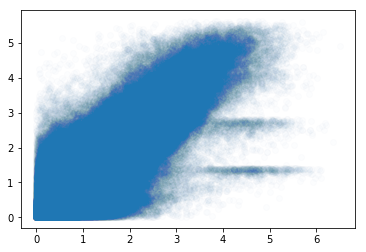

In [19]:
# works for 1
# plotting 1/3 of data (1,000,000)

ax = plt.scatter(s2[s1_gt_zero & s2_gt_zero][:1000000] / np.nanmean(s2[s2_gt_zero]),
            s1[s1_gt_zero & s2_gt_zero][:1000000] / np.nanmean(s1[s1_gt_zero]), alpha=0.01)


In [59]:
date = ds['time.year']

date

<xarray.DataArray 'year' (time: 6)>
array([2013, 2014, 2015, 2016, 2017, 2018])
Coordinates:
  * time     (time) datetime64[ns] 2013-04-03 2014-04-07 ... 2018-04-23

In [38]:
# Create matrix with indices
index_matrix = np.zeros((5,5), dtype = int)
k_index = 1
for i_row in range(5):
    for i_column in range(5):
        index_matrix[i_row, i_column] = k_index
        k_index += 1


for i_year in range(4):
    ds.time
        

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
